In [1]:
%matplotlib inline

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Exam Preparation

### Live Demos

In [22]:
EPSILON = 1e-6

In [7]:
spaceship_titanic = pd.read_csv('Data/train.csv', true_values=['True'], false_values=['Flase'])

In [8]:
spaceship_titanic

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [9]:
spaceship_titanic.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [12]:
spaceship_titanic.CryoSleep.value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

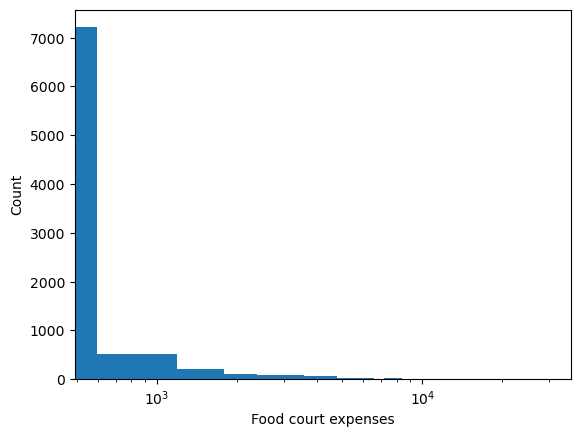

In [15]:
plt.hist(spaceship_titanic.FoodCourt, bins=50)
plt.semilogx()

plt.xlabel('Food court expenses')
plt.ylabel('Count')
plt.show()

In [18]:
pd.qcut(spaceship_titanic.FoodCourt, q = 20, duplicates = 'drop').value_counts().sort_index()

(-0.001, 1.0]        5572
(1.0, 13.0]           395
(13.0, 76.0]          416
(76.0, 258.0]         426
(258.0, 608.0]        425
(608.0, 1026.0]       426
(1026.0, 2748.5]      424
(2748.5, 29813.0]     426
Name: FoodCourt, dtype: int64

In [19]:
spaceship_titanic[spaceship_titanic.FoodCourt ==0]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
12,0009_01,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False


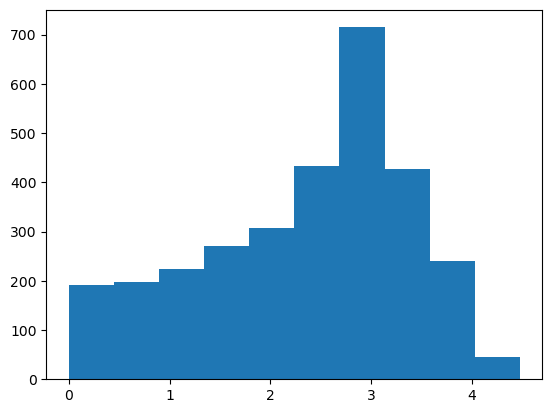

In [21]:
plt.hist(np.log10(spaceship_titanic.FoodCourt[spaceship_titanic.FoodCourt>0]))
plt.show()

In [23]:
spaceship_titanic.loc[spaceship_titanic.FoodCourt <= 0, 'FoodCourt'] = EPSILON

In [34]:
positive_values_transformer = FunctionTransformer(func = lambda x: np.array([EPSILON if elem <= 0 else elem for elem in x]))

In [35]:
positive_values_transformer.transform([1, 2, 3, 0, -5, -10])

array([1.e+00, 2.e+00, 3.e+00, 1.e-06, 1.e-06, 1.e-06])

In [36]:
log_transformer = FunctionTransformer(func = lambda x: np.log10(x))

In [38]:
pos_values = positive_values_transformer.transform([1, 2, 3, 0, -5, -10])
log_transformer.transform(pos_values)

array([ 0.        ,  0.30103   ,  0.47712125, -6.        , -6.        ,
       -6.        ])

In [41]:
log_pipeline = Pipeline([
    ('pos_values', positive_values_transformer),
    ('log10', log_transformer)]
)

In [42]:
log_pipeline.transform([1, 2, 3, 0, -5, -10])

array([ 0.        ,  0.30103   ,  0.47712125, -6.        , -6.        ,
       -6.        ])

In [43]:
log_pipeline.steps

[('pos_values',
  FunctionTransformer(func=<function <lambda> at 0x0000019F84FC1310>)),
 ('log10',
  FunctionTransformer(func=<function <lambda> at 0x0000019F84FC1B80>))]

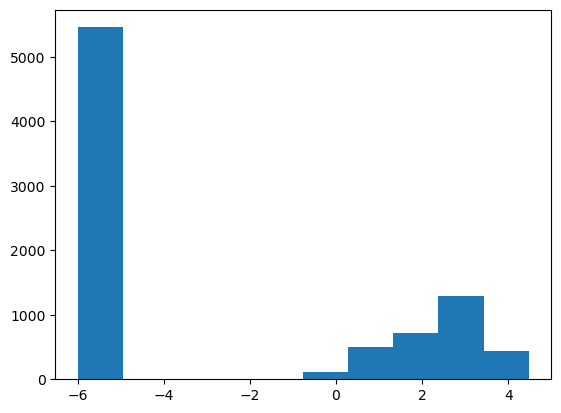

In [45]:
plt.hist(log_pipeline.transform(spaceship_titanic.FoodCourt))
plt.show()

In [47]:
spaceship_titanic.HomePlanet.value_counts(dropna= False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [48]:
pd.get_dummies(spaceship_titanic.HomePlanet, dummy_na=True)

,Earth,Europa,Mars,NaN
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
8688,0,1,0,0
8689,1,0,0,0
8690,1,0,0,0
8691,0,1,0,0


In [52]:
spaceship_titanic.HomePlanet.fillna('Unknown').value_counts()

Earth      4602
Europa     2131
Mars       1759
Unknown     201
Name: HomePlanet, dtype: int64

In [58]:
ohe = OneHotEncoder()
ohe.fit(spaceship_titanic.HomePlanet.values.reshape(-1, 1))

OneHotEncoder()

In [59]:
ohe.categories_

[array(['Earth', 'Europa', 'Mars', nan], dtype=object)]

In [62]:
ohe.transform(spaceship_titanic.HomePlanet.values.reshape(-1, 1))

<8693x4 sparse matrix of type '<class 'numpy.float64'>'
	with 8693 stored elements in Compressed Sparse Row format>

In [98]:
def fill_in_planets(planets):
    planets.fillna('Unknown')
    planets_column = planets.values.reshape(-1, 1)
    return planets_column

In [99]:
home_planet_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func = fill_in_planets)),
    ('ohe', OneHotEncoder()),
    ('create_dense_matrix', FunctionTransformer(func = lambda x: np.array(x.todense())))
])

In [100]:
home_planet_pipeline.fit(spaceship_titanic.HomePlanet)

Pipeline(steps=[('fill_na',
                 FunctionTransformer(func=<function fill_in_planets at 0x0000019F89360EE0>)),
                ('ohe', OneHotEncoder()),
                ('create_dense_matrix',
                 FunctionTransformer(func=<function <lambda> at 0x0000019F89360DC0>))])

In [102]:
transformed_home_planets = home_planet_pipeline.transform(spaceship_titanic.HomePlanet)
transformed_home_planets

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [103]:
pca = PCA(n_components = 2)
pca.fit(transformed_home_planets)

PCA(n_components=2)

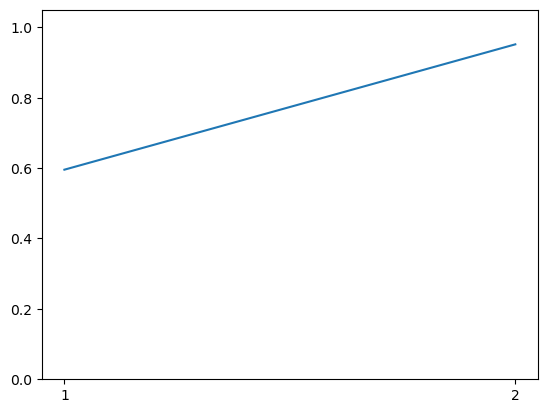

In [104]:
plt.plot(np.arange(1, len(pca.components_) +1), np.cumsum(pca.explained_variance_ratio_))
plt.ylim(0, 1.05)
plt.xticks(np.arange(1, len(pca.components_) +1))
plt.show()

In [113]:
home_planet_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func = fill_in_planets)),
    ('ohe', OneHotEncoder()),
    ('create_dense_matrix', FunctionTransformer(func = lambda x: np.array(x.todense()))),
    ('pca', PCA(n_components = 2))
])

In [114]:
home_planet_pipeline.fit(spaceship_titanic.HomePlanet)

Pipeline(steps=[('fill_na',
                 FunctionTransformer(func=<function fill_in_planets at 0x0000019F89360EE0>)),
                ('ohe', OneHotEncoder()),
                ('create_dense_matrix',
                 FunctionTransformer(func=<function <lambda> at 0x0000019F8937A550>)),
                ('pca', PCA(n_components=2))])

In [115]:
transformed_home_planets = home_planet_pipeline.transform(spaceship_titanic.HomePlanet)

In [116]:
transformed_home_planets

array([[ 0.74289896, -0.58169619],
       [-0.56620817, -0.04707087],
       [ 0.74289896, -0.58169619],
       ...,
       [-0.56620817, -0.04707087],
       [ 0.74289896, -0.58169619],
       [ 0.74289896, -0.58169619]])

In [119]:
search = GridSearchCV(home_planet_pipeline, param_grid={
    'pca__n_components': [1, 2, 3, 4],
})

In [120]:
search.fit(spaceship_titanic.HomePlanet)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-1.45097405 -0.2199532         -inf        -inf]
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:978: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


GridSearchCV(estimator=Pipeline(steps=[('fill_na',
                                        FunctionTransformer(func=<function fill_in_planets at 0x0000019F89360EE0>)),
                                       ('ohe', OneHotEncoder()),
                                       ('create_dense_matrix',
                                        FunctionTransformer(func=<function <lambda> at 0x0000019F8937A550>)),
                                       ('pca', PCA(n_components=2))]),
             param_grid={'pca__n_components': [1, 2, 3, 4]})

In [121]:
search.cv_results_

{'mean_fit_time': array([0.01221385, 0.0119329 , 0.00625024, 0.00312529]),
 'std_fit_time': array([0.00708254, 0.00606708, 0.00765495, 0.00625057]),
 'mean_score_time': array([0.00423656, 0.00922174, 0.        , 0.00624943]),
 'std_score_time': array([0.00365651, 0.01223334, 0.        , 0.00765395]),
 'param_pca__n_components': masked_array(data=[1, 2, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'pca__n_components': 1},
  {'pca__n_components': 2},
  {'pca__n_components': 3},
  {'pca__n_components': 4}],
 'split0_test_score': array([-1.42556499, -0.13879519, 13.53009794,        -inf]),
 'split1_test_score': array([-1.45059461, -0.25972173, 14.37830609, 17.24216434]),
 'split2_test_score': array([-1.53664913, -0.24710998,        -inf,        -inf]),
 'split3_test_score': array([-1.42801955, -0.25251356,        -inf, 23.4471231 ]),
 'split4_test_score': array([-1.41404198, -0.20162552, 13.49400695,        -inf]),

In [122]:
 search.best_params_

{'pca__n_components': 2}